In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import scipy
import math
from datetime import time, timedelta
from datetime import datetime
from scipy import stats
import datetime
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Matplotlib Default Parameter

from matplotlib import rcParams
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']


# display all columns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option("display.max_rows", None)

# intstall timestamp encoder
!pip install pendulum


from imblearn import over_sampling
from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report




import networkx as nx
import math as math
from sklearn.metrics import mean_squared_error


# Read Data

In [2]:
# Create Data Info
"""fungsi yang akan mensummary value dalam feature"""
def summary(x):
  list_item = []
  for col in x.columns:
      list_item.append([col, x[col].dtype, x[col].isna().sum(), 100*x[col].isna().sum()/len(x[col]), x[col].nunique(), x[col].unique()[:4]])
  desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
  return desc_df

## Median Jams Kota Bogor  

In [3]:
# read data
df_agg = pd.read_csv("aggregate_median_jams_Kota Bogor.csv")

In [4]:
df_agg.sample(1)

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
32916,32916,2022-07-26 10:00:00.000,32.71,KOTA BOGOR,Haji Achmad Sobana,3,640.0,123.0,10.42,11,34764116,2022-07-26,3.0,"MULTILINESTRING ((106.812556 -6.581259, 106.81..."


In [5]:
df_agg.shape

(102322, 14)

In [6]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102322 entries, 0 to 102321
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 102322 non-null  int64  
 1   time                       102322 non-null  object 
 2   kemendagri_kabupaten_kode  102322 non-null  float64
 3   kemendagri_kabupaten_nama  102322 non-null  object 
 4   street                     100529 non-null  object 
 5   level                      102322 non-null  int64  
 6   median_length              102322 non-null  float64
 7   median_delay               102322 non-null  float64
 8   median_speed_kmh           102322 non-null  float64
 9   total_records              102322 non-null  int64  
 10  id                         102322 non-null  int64  
 11  date                       102322 non-null  object 
 12  median_level               102322 non-null  float64
 13  geometry                   10

In [7]:
df_agg.columns

Index(['Unnamed: 0', 'time', 'kemendagri_kabupaten_kode',
       'kemendagri_kabupaten_nama', 'street', 'level', 'median_length',
       'median_delay', 'median_speed_kmh', 'total_records', 'id', 'date',
       'median_level', 'geometry'],
      dtype='object')

In [8]:
df_agg.drop(['Unnamed: 0'], axis = 'columns', inplace = True)

In [9]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102322 entries, 0 to 102321
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   time                       102322 non-null  object 
 1   kemendagri_kabupaten_kode  102322 non-null  float64
 2   kemendagri_kabupaten_nama  102322 non-null  object 
 3   street                     100529 non-null  object 
 4   level                      102322 non-null  int64  
 5   median_length              102322 non-null  float64
 6   median_delay               102322 non-null  float64
 7   median_speed_kmh           102322 non-null  float64
 8   total_records              102322 non-null  int64  
 9   id                         102322 non-null  int64  
 10  date                       102322 non-null  object 
 11  median_level               102322 non-null  float64
 12  geometry                   102322 non-null  object 
dtypes: float64(5), int64(3), obje

In [10]:
df_agg.sample(1)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
45299,2022-08-02 10:00:00.000,32.71,KOTA BOGOR,Letjen Ibrahim Adjie,2,1119.0,76.0,20.63,65,35213463,2022-08-02,2.0,"MULTILINESTRING ((106.751498 -6.573561, 106.75..."


In [11]:
df_agg["time"] = pd.to_datetime(df_agg["time"])

In [12]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102322 entries, 0 to 102321
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   time                       102322 non-null  datetime64[ns]
 1   kemendagri_kabupaten_kode  102322 non-null  float64       
 2   kemendagri_kabupaten_nama  102322 non-null  object        
 3   street                     100529 non-null  object        
 4   level                      102322 non-null  int64         
 5   median_length              102322 non-null  float64       
 6   median_delay               102322 non-null  float64       
 7   median_speed_kmh           102322 non-null  float64       
 8   total_records              102322 non-null  int64         
 9   id                         102322 non-null  int64         
 10  date                       102322 non-null  object        
 11  median_level               102322 non-null  float64 

In [13]:
df_agg['hour'] = df_agg["time"].dt.hour

In [14]:
df_agg['day'] = df_agg["time"].dt.day_name()

In [15]:
df_agg.sample(2)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,hour,day
99057,2022-09-03 14:00:00,32.71,KOTA BOGOR,Kapten Yusuf,2,467.0,87.5,10.02,30,37148157,2022-09-03,2.0,"MULTILINESTRING ((106.783669 -6.618487, 106.78...",14,Saturday
44916,2022-08-02 05:00:00,32.71,KOTA BOGOR,Mayjen Ishak Djuarsa,1,1079.0,62.0,23.53,1,35213094,2022-08-02,1.0,"LINESTRING (106.773115 -6.588979, 106.775145 -...",5,Tuesday


In [16]:
df_agg['days_type'] = ['Weekend' if x == 'Saturday' else 
                                       ('Weekend' if x == 'Sunday'  else 'Weekdays') for x in df_agg['day']]
                        

In [17]:
df_agg['hour_type'] = ['Rush_AM' if (7<=x<=10) else
                         ('Rush_PM' if (17<=x<=20) else 
                          ('Mid_Day' if (10<x<17) else 'Reguler')) for x in df_agg['hour']]

In [18]:
df_agg.sample(2)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,hour,day,days_type,hour_type
1726,2022-07-07 09:00:00,32.71,KOTA BOGOR,Mayjen Ishak Djuarsa,1,983.0,76.0,21.02,9,33533886,2022-07-07,1.0,"MULTILINESTRING ((106.779668 -6.596205, 106.77...",9,Thursday,Weekdays,Rush_AM
57531,2022-08-09 10:00:00,32.71,KOTA BOGOR,HM Syarifudin,2,353.0,60.0,10.42,2,35674331,2022-08-09,2.0,"LINESTRING (106.757549 -6.56941, 106.758077 -6...",10,Tuesday,Weekdays,Rush_AM


In [19]:
df_agg.shape

(102322, 17)

In [20]:
summary(df_agg)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,time,datetime64[ns],0,0.000000,1465,"[2022-07-06T00:00:00.000000000, 2022-07-06T01:..."
1,kemendagri_kabupaten_kode,float64,0,0.000000,1,[32.71]
2,kemendagri_kabupaten_nama,object,0,0.000000,1,[KOTA BOGOR]
3,street,object,1793,1.752311,454,"[Pahlawan, Tol Lingkar Luar Bogor, KH Soleh Is..."
4,level,int64,0,0.000000,5,"[2, 5, 3, 1]"
5,median_length,float64,0,0.000000,3845,"[784.0, 1314.0, 167.0, 379.0]"
6,median_delay,float64,0,0.000000,1641,"[62.0, 63.0, -1.0, 117.5]"
7,median_speed_kmh,float64,0,0.000000,9397,"[20.310001, 37.71, 0.0, 8.594999]"
8,total_records,int64,0,0.000000,197,"[4, 2, 61, 10]"
9,id,int64,0,0.000000,102322,"[33469021, 33469023, 33469019, 33469020]"


# Data Cleansing

In [21]:
# Check Duplicated Data

print(f'Number of duplicated data = {df_agg.duplicated().sum()}')

Number of duplicated data = 0


In [22]:
# drop null value in feature target
def dropvalue (x,y):
  """function yang akan menghapus feature yang memiliki null value"""
  for y in y:
    drop = x.dropna(subset=[y],inplace=True)
  return drop

In [23]:
dropvalue(df_agg, ["street"])

In [24]:
summary(df_agg)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,time,datetime64[ns],0,0.0,1465,"[2022-07-06T00:00:00.000000000, 2022-07-06T01:..."
1,kemendagri_kabupaten_kode,float64,0,0.0,1,[32.71]
2,kemendagri_kabupaten_nama,object,0,0.0,1,[KOTA BOGOR]
3,street,object,0,0.0,454,"[Pahlawan, Tol Lingkar Luar Bogor, KH Soleh Is..."
4,level,int64,0,0.0,5,"[2, 5, 3, 1]"
5,median_length,float64,0,0.0,3829,"[784.0, 1314.0, 167.0, 379.0]"
6,median_delay,float64,0,0.0,1640,"[62.0, 63.0, -1.0, 117.5]"
7,median_speed_kmh,float64,0,0.0,9384,"[20.310001, 37.71, 0.0, 8.594999]"
8,total_records,int64,0,0.0,197,"[4, 2, 61, 10]"
9,id,int64,0,0.0,100529,"[33469021, 33469023, 33469019, 33469020]"


# EDA

In [25]:
# Grouping Features Based on Their Data Type

agg_num = df_agg.select_dtypes(include=[np.number], exclude=[np.bool]).columns
agg_cat = df_agg.select_dtypes(exclude=[np.number]).columns

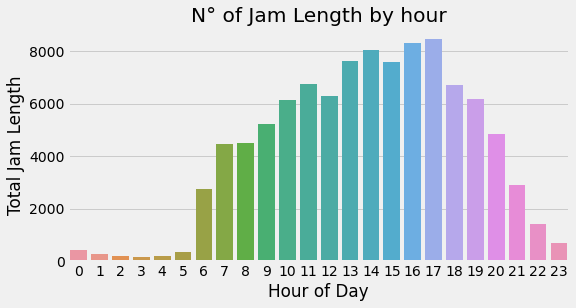

In [26]:
plt.figure(figsize = (8,4))
# Orders by hour
orderbyhour = df_agg.groupby(df_agg["time"].dt.hour)["median_length"].count().reset_index().sort_values(by="time", ascending=False)
orderbyhour.rename(columns={"median_length":"Total Jam Length", "time": "Hour of Day"}, inplace=True)
orderbyhour_ax = sns.barplot(x="Hour of Day", y="Total Jam Length", data=orderbyhour)
orderbyhour_ax.set_title("N° of Jam Length by hour")
plt.show()

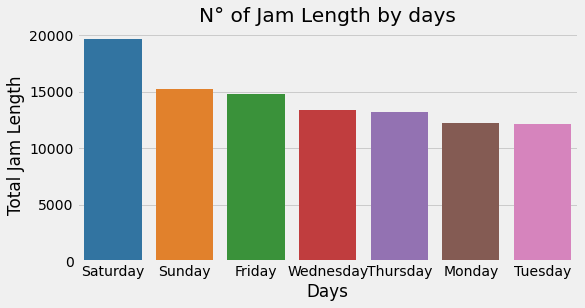

In [27]:
plt.figure(figsize = (8,4))
# Orders by days
orderbydays = df_agg.groupby(df_agg["time"].dt.day_name())["median_length"].count().reset_index().sort_values(by="time", ascending=False)
orderbydays.rename(columns={"median_length":"Total Jam Length", "time": "Days"}, inplace=True)
orderbydays = orderbydays.sort_values(by="Total Jam Length", ascending=False)
orderbydays = sns.barplot(x="Days", y="Total Jam Length", data=orderbydays)
orderbydays.set_title("N° of Jam Length by days")
plt.show()

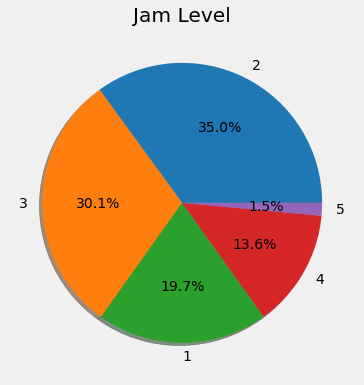

In [28]:
f,ax=plt.subplots(figsize=(8,6))
df_agg['level'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
ax.set_title('Jam Level')
ax.set_ylabel('')
plt.show()

In [29]:
zz = df_agg[(df_agg['level'] == 5) | (df_agg['level'] == 4) | (df_agg['level'] == 3)]

In [30]:
zz.sample(3)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,hour,day,days_type,hour_type
55238,2022-08-07 17:00:00,32.71,KOTA BOGOR,N9 Jalan Raya Ciawi,4,1081.0,989.5,3.415,24,35546172,2022-08-07,4.0,"MULTILINESTRING ((106.847234 -6.655619, 106.84...",17,Sunday,Weekend,Rush_PM
19049,2022-07-17 18:00:00,32.71,KOTA BOGOR,Kapten Yusuf,3,776.5,266.5,6.265,42,34197201,2022-07-17,3.0,"MULTILINESTRING ((106.781568 -6.622825, 106.78...",18,Sunday,Weekend,Rush_PM
101465,2022-09-04 15:00:00,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000,40,37225210,2022-09-04,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80...",15,Sunday,Weekend,Mid_Day


In [31]:
zz['street'].value_counts()

N9 Raden KH Abdullah bin Nuh                                1920
KH Soleh Iskandar (Jalur Lambat)                            1752
N9 Jalan Raya Dramaga                                       1639
N9 Jalan Raya Pajajaran                                     1604
N8 Jalan Raya Bogor                                         1538
N9 KH Soleh Iskandar                                        1353
Jalan Empang                                                1325
Kapten Muslihat                                             1230
N9 KS Tubun                                                 1175
Semplak Raya                                                1148
Jenderal Ahmad Yani                                         1092
N9 Jalan Raya Ciawi                                         1048
N9 Jalan Raya Tajur                                         1024
Brigjen Saptadji Hadi Prawira                               1015
Pahlawan                                                     984
Kapten Yusuf             

In [32]:
df_agg_activity = zz.groupby('street', as_index=False)['level'].count()
df_agg_activity

,street,level
0,AH Nasution,11
1,Achmad Adnawijaya,390
2,Airlangga,2
3,Akses Tol Tajur,31
4,Al-Hasanah,1
5,An Nashr,2
6,Anggrek 12,2
7,Angsana,1
8,Arah Bogor Kota/Kebun Raya,26
9,Arah Bogor/Cibinong/Jakarta,4


# Data Preprocessing

In [33]:
asas = df_agg_activity.sort_values(by='level', ascending=False).head(15)

In [34]:
asas

,street,level
278,N9 Raden KH Abdullah bin Nuh,1920
205,KH Soleh Iskandar (Jalur Lambat),1752
271,N9 Jalan Raya Dramaga,1639
272,N9 Jalan Raya Pajajaran,1604
264,N8 Jalan Raya Bogor,1538
274,N9 KH Soleh Iskandar,1353
181,Jalan Empang,1325
209,Kapten Muslihat,1230
275,N9 KS Tubun,1175
359,Semplak Raya,1148


In [35]:
street_list = asas['street'].tolist()

In [36]:
street_list

['N9 Raden KH Abdullah bin Nuh',
 'KH Soleh Iskandar (Jalur Lambat)',
 'N9 Jalan Raya Dramaga',
 'N9 Jalan Raya Pajajaran',
 'N8 Jalan Raya Bogor',
 'N9 KH Soleh Iskandar',
 'Jalan Empang',
 'Kapten Muslihat',
 'N9 KS Tubun',
 'Semplak Raya',
 'Jenderal Ahmad Yani',
 'N9 Jalan Raya Ciawi',
 'N9 Jalan Raya Tajur',
 'Brigjen Saptadji Hadi Prawira',
 'Pahlawan']

In [37]:
df_agg['new_street'] = [ 'N9 Raden KH Abdullah bin Nuh' if x == 'N9 Raden KH Abdullah bin Nuh' else
                        ('KH Soleh Iskandar (Jalur Lambat)' if x == 'KH Soleh Iskandar (Jalur Lambat)' else 
                         ('N9 Jalan Raya Dramaga' if x == 'N9 Jalan Raya Dramaga' else
                          ('N9 Raden KH Abdullah bin Nuh' if x == 'N9 Raden KH Abdullah bin Nuh' else 
                           ('N9 Jalan Raya Dramaga' if x == 'N9 Jalan Raya Dramaga' else
                            ('N9 Jalan Raya Pajajaran' if x == 'N9 Jalan Raya Pajajaran' else
                             ('N8 Jalan Raya Bogor' if x == 'N8 Jalan Raya Bogor' else
                              ('N9 KH Soleh Iskandar' if x == 'N9 KH Soleh Iskandar' else
                               ('Jalan Empang' if x == 'Jalan Empang' else
                                ('Kapten Muslihat' if x == 'Kapten Muslihat' else
                                 ('N9 KS Tubun' if x == 'N9 KS Tubun' else
                                  ('Semplak Raya' if x == 'Semplak Raya' else
                                   ('Jenderal Ahmad Yani' if x == 'Jenderal Ahmad Yani' else
                                    ('N9 Jalan Raya Ciawi' if x == 'N9 Jalan Raya Ciawi' else
                                     ('N9 Jalan Raya Tajur' if x == 'N9 Jalan Raya Tajur' else
                                      ('Brigjen Saptadji Hadi Prawira' if x == 'Brigjen Saptadji Hadi Prawira' else
                                       ('Pahlawan' if x == 'Pahlawan' else 'Others')))))))))))))))) for x in df_agg['street']]

In [38]:
df_agg['new_level'] = [ 1 if x == 3 else
                        ( 1 if x == 4 else 
                         ( 1 if x == 5 else 0 )) for x in df_agg['level']]

In [39]:
df_agg.sample(3)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,hour,day,days_type,hour_type,new_street,new_level
32916,2022-07-26 10:00:00,32.71,KOTA BOGOR,Haji Achmad Sobana,3,640.0,123.0,10.420000,11,34764116,2022-07-26,3.0,"MULTILINESTRING ((106.812556 -6.581259, 106.81...",10,Tuesday,Weekdays,Rush_AM,Others,1
30031,2022-07-24 14:00:00,32.71,KOTA BOGOR,N9 Jalak Harupat,3,1026.0,174.0,13.515000,38,34645646,2022-07-24,3.0,"MULTILINESTRING ((106.79706 -6.593115, 106.797...",14,Sunday,Weekend,Mid_Day,Others,1
67667,2022-08-15 08:00:00,32.71,KOTA BOGOR,Kedunghalang Raya,3,1208.0,200.5,13.174999,6,36027674,2022-08-15,3.0,"MULTILINESTRING ((106.807957 -6.553399, 106.80...",8,Monday,Weekdays,Rush_AM,Others,1


<AxesSubplot:>

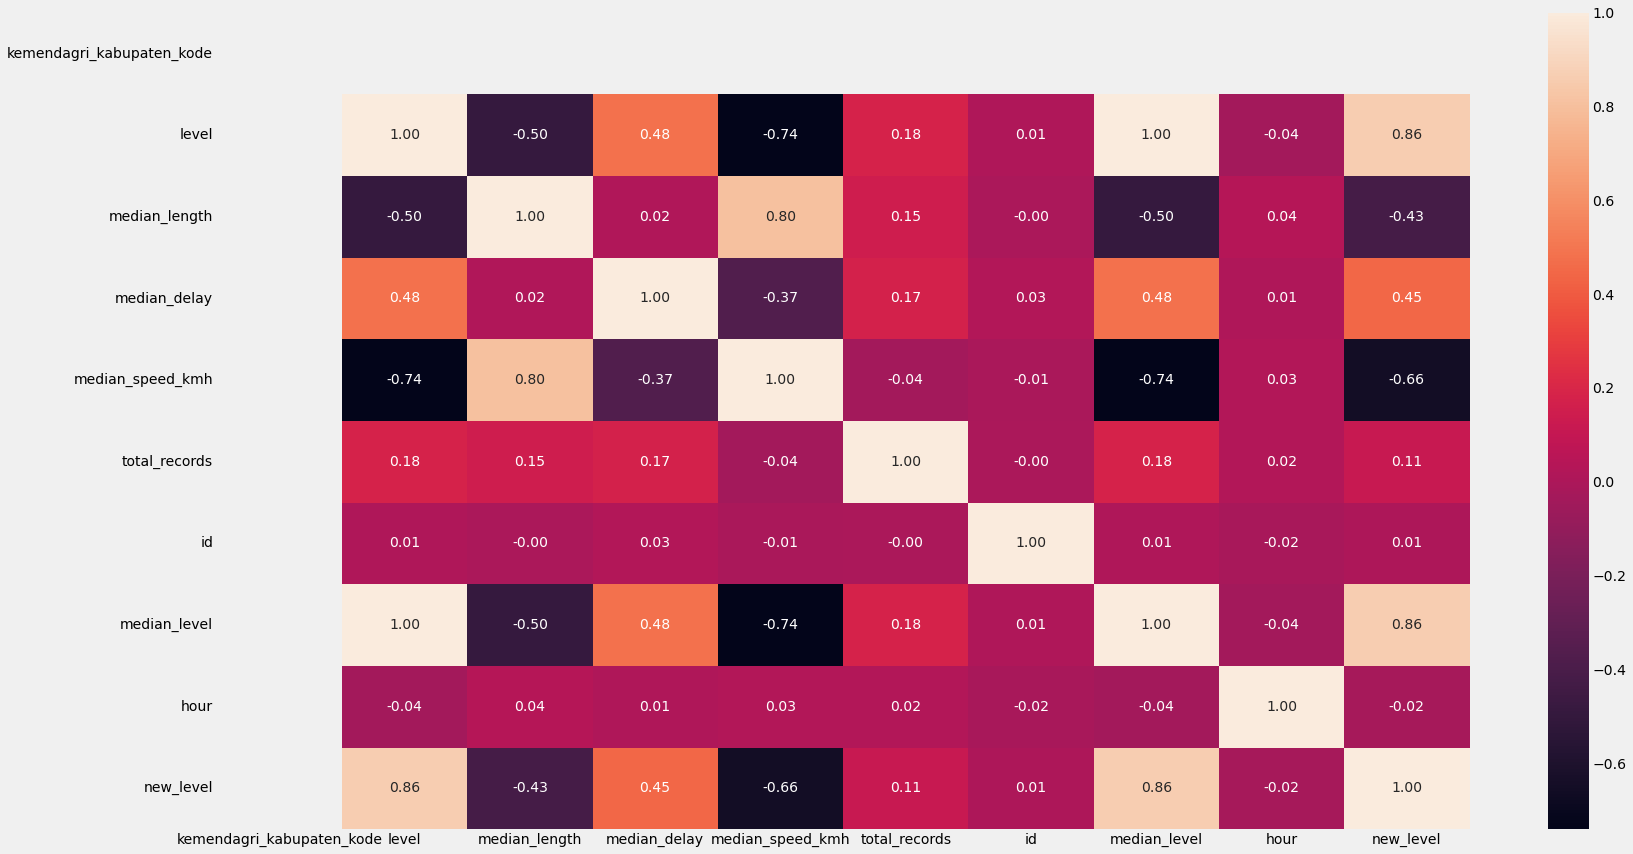

In [40]:
# correlation heatmap
plt.figure(figsize=(25,14))
correlation = df_agg.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [41]:
df_fix = df_agg.copy()
df_fix.drop(['time','kemendagri_kabupaten_kode','kemendagri_kabupaten_nama','street','level','id','date','median_level','geometry'], axis = 'columns', inplace = True)
df_fix.sample(2)

,median_length,median_delay,median_speed_kmh,total_records,hour,day,days_type,hour_type,new_street,new_level
87965,620.0,88.5,15.87,2,3,Sunday,Weekend,Reguler,N9 Jalan Raya Tajur,1
16458,617.0,160.0,6.91,11,16,Saturday,Weekend,Mid_Day,Others,1


# Encoding

In [42]:
# Grouping Features Based on Their Data Type

df_fix_num = df_fix.select_dtypes(include=[np.number], exclude=[np.bool]).columns
df_fix_cat = df_fix.select_dtypes(exclude=[np.number]).columns

In [43]:
fixdf_cat = pd.get_dummies(df_fix[df_fix_cat].iloc[:,:])
fixdf_cat.head(2)

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,days_type_Weekdays,days_type_Weekend,hour_type_Mid_Day,hour_type_Reguler,hour_type_Rush_AM,hour_type_Rush_PM,new_street_Brigjen Saptadji Hadi Prawira,new_street_Jalan Empang,new_street_Jenderal Ahmad Yani,new_street_KH Soleh Iskandar (Jalur Lambat),new_street_Kapten Muslihat,new_street_N8 Jalan Raya Bogor,new_street_N9 Jalan Raya Ciawi,new_street_N9 Jalan Raya Dramaga,new_street_N9 Jalan Raya Pajajaran,new_street_N9 Jalan Raya Tajur,new_street_N9 KH Soleh Iskandar,new_street_N9 KS Tubun,new_street_N9 Raden KH Abdullah bin Nuh,new_street_Others,new_street_Pahlawan,new_street_Semplak Raya
0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
df_new = pd.concat([df_fix[df_fix_num],fixdf_cat], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100529 entries, 0 to 102321
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   median_length                                100529 non-null  float64
 1   median_delay                                 100529 non-null  float64
 2   median_speed_kmh                             100529 non-null  float64
 3   total_records                                100529 non-null  int64  
 4   hour                                         100529 non-null  int64  
 5   new_level                                    100529 non-null  int64  
 6   day_Friday                                   100529 non-null  uint8  
 7   day_Monday                                   100529 non-null  uint8  
 8   day_Saturday                                 100529 non-null  uint8  
 9   day_Sunday                                   100529 non-nul

In [45]:
df_new.shape

(100529, 35)

In [46]:
df_new.head(2)

,median_length,median_delay,median_speed_kmh,total_records,hour,new_level,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,days_type_Weekdays,days_type_Weekend,hour_type_Mid_Day,hour_type_Reguler,hour_type_Rush_AM,hour_type_Rush_PM,new_street_Brigjen Saptadji Hadi Prawira,new_street_Jalan Empang,new_street_Jenderal Ahmad Yani,new_street_KH Soleh Iskandar (Jalur Lambat),new_street_Kapten Muslihat,new_street_N8 Jalan Raya Bogor,new_street_N9 Jalan Raya Ciawi,new_street_N9 Jalan Raya Dramaga,new_street_N9 Jalan Raya Pajajaran,new_street_N9 Jalan Raya Tajur,new_street_N9 KH Soleh Iskandar,new_street_N9 KS Tubun,new_street_N9 Raden KH Abdullah bin Nuh,new_street_Others,new_street_Pahlawan,new_street_Semplak Raya
0,784.0,62.0,20.310001,4,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1314.0,63.0,37.710000,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
col = df_new.columns

# Stratified Sampling

In [48]:
df_model = df_new.copy()
train,test = train_test_split(df_model, test_size=0.3, stratify=df_model['new_level'], random_state = 42)
print("jumlah data training",train.shape[0], "atau", round(train.shape[0]/df_model.shape[0]*100),'% dari total data')
print("jumlah data test",test.shape[0], "atau", round(test.shape[0]/df_model.shape[0]*100),'% dari total data')

jumlah data training 70370 atau 70 % dari total data
jumlah data test 30159 atau 30 % dari total data


# Balancing Data

In [49]:
X_train_smote = train.drop('new_level', axis=1)
y_train_smote = train['new_level']

X_test_smote = test.drop('new_level', axis=1)
y_test_smote = test['new_level']

X_resampled_train_smt, y_resampled_train_smt = SMOTE(random_state=42).fit_resample(X_train_smote, y_train_smote)

print("jumlah data training sebelum smote =",train.shape[0])
print("jumlah data training smote =",X_resampled_train_smt.shape[0])
print('\nBalance of positive and negative classes (%):')
y_resampled_train_smt.value_counts(normalize=True) * 100

jumlah data training sebelum smote = 70370
jumlah data training smote = 77072

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: new_level, dtype: float64

# Modeling

In [50]:
df_baseline_dt = DecisionTreeClassifier(random_state=42)
df_baseline_dt.fit(X_resampled_train_smt,y_resampled_train_smt)
y_pred_df_baseline_dt_train = df_baseline_dt.predict(X_train_smote)
y_pred_df_baseline_dt = df_baseline_dt.predict(X_test_smote)
print('precision_score Training',precision_score(y_train_smote, y_pred_df_baseline_dt_train))
print('precision_score Testing',precision_score(y_test_smote, y_pred_df_baseline_dt))

precision_score Training 1.0
precision_score Testing 0.9147354613030171


In [51]:
df_baseline_rf = RandomForestClassifier(random_state=42)
df_baseline_rf.fit(X_resampled_train_smt,y_resampled_train_smt)
y_pred_df_baseline_rf_train = df_baseline_rf.predict(X_train_smote)
y_pred_df_baseline_rf = df_baseline_rf.predict(X_test_smote)
print('precision_score Training',precision_score(y_train_smote, y_pred_df_baseline_rf_train))
print('precision_score Testing',precision_score(y_test_smote, y_pred_df_baseline_rf))

precision_score Training 1.0
precision_score Testing 0.9281045751633987


In [52]:
import xgboost as xgb
df_baseline_xgb = xgb.XGBClassifier(random_state=42)
df_baseline_xgb.fit(X_resampled_train_smt, y_resampled_train_smt)
y_pred_df_baseline_xgb_train = df_baseline_xgb.predict(X_train_smote)
y_pred_df_baseline_xgb = df_baseline_xgb.predict(X_test_smote)
print('precision_score Training',precision_score(y_train_smote, y_pred_df_baseline_xgb_train))
print('precision_score Testing',precision_score(y_test_smote, y_pred_df_baseline_xgb))

precision_score Training 0.9635712247550807
precision_score Testing 0.9415191740412979


In [53]:
results_baseline={}
results_baseline["Decision Tree Classification"]=precision_score(y_test_smote, y_pred_df_baseline_dt)
results_baseline["Random Forest Classification"]=precision_score(y_test_smote, y_pred_df_baseline_rf)
results_baseline["XGBoost Classification"]=precision_score(y_test_smote, y_pred_df_baseline_xgb)


results_baseline = pd.DataFrame.from_dict(results_baseline,orient='index')

results_baseline.columns=["precision_score_baseline_model"]

results_baseline['precision_score_training_model'] = precision_score(y_train_smote, y_pred_df_baseline_dt_train), precision_score(y_train_smote, y_pred_df_baseline_rf_train), precision_score(y_train_smote, y_pred_df_baseline_xgb_train)
results_baseline.sort_values(['precision_score_baseline_model'], ascending=False)

,precision_score_baseline_model,precision_score_training_model
XGBoost Classification,0.941519,0.963571
Random Forest Classification,0.928105,1.000000
Decision Tree Classification,0.914735,1.000000


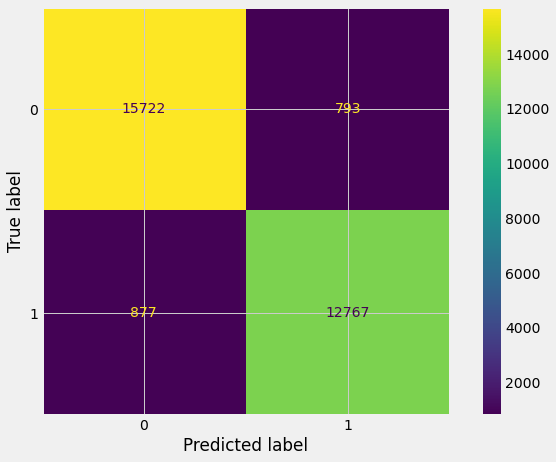

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     16515
           1       0.94      0.94      0.94     13644

    accuracy                           0.94     30159
   macro avg       0.94      0.94      0.94     30159
weighted avg       0.94      0.94      0.94     30159



In [54]:
fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test_smote, y_pred_df_baseline_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test_smote, y_pred_df_baseline_xgb))
plt.show()

# Parameter Tuning

In [55]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [56]:
%%time
#hyperparameter tuning
df_improvement_xgb = xgb.XGBClassifier(random_state=42)
parameters = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 1.0],
    'colsample_bytree':  [0.5, 1.0],
    'colsample_bylevel':  [0.5, 1.0],
    'n_estimators': [50, 100, 500]
}
         
xgb_clf_gridcv = GridSearchCV(df_improvement_xgb, parameters, cv=3, scoring='precision')
xgb_clf_gridcv.fit(X_resampled_train_smt, y_resampled_train_smt)

CPU times: total: 4h 17min 5s
Wall time: 1h 23min 23s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [57]:
y_pred_df_improvement_xgb = xgb_clf_gridcv.best_estimator_.predict(X_test_smote)
print('precision_score',precision_score(y_test_smote, y_pred_df_improvement_xgb))

precision_score 0.9477331367489864


In [58]:
results={}
results["XGBoost Classification"]=precision_score(y_test_smote, y_pred_df_baseline_xgb)
results = pd.DataFrame.from_dict(results,orient='index')
results.columns=["precision_score_baseline_model"] 
results['precision_score_improvement_model'] = precision_score(y_test_smote, y_pred_df_improvement_xgb)
results.sort_values(['precision_score_improvement_model'], ascending=False)

,precision_score_baseline_model,precision_score_improvement_model
XGBoost Classification,0.941519,0.947733


In [59]:
xgb_clf_gridcv.best_params_

{'colsample_bylevel': 0.5,
 'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 1.0}

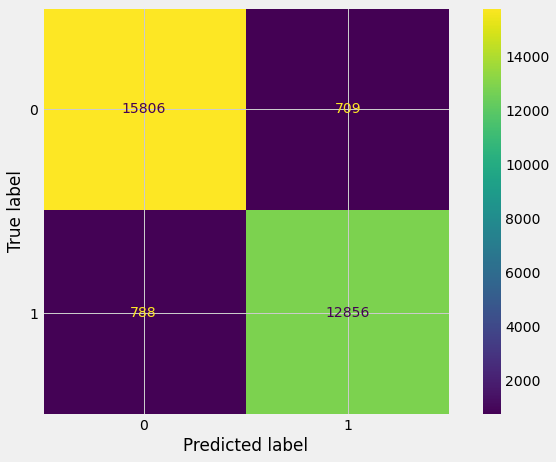

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     16515
           1       0.95      0.94      0.94     13644

    accuracy                           0.95     30159
   macro avg       0.95      0.95      0.95     30159
weighted avg       0.95      0.95      0.95     30159



In [60]:
fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test_smote, y_pred_df_improvement_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test_smote, y_pred_df_improvement_xgb))

In [61]:
feature_importance = pd.DataFrame({'Feature':X_resampled_train_smt.columns,
                      'Importance':xgb_clf_gridcv.best_estimator_.feature_importances_*100}).sort_values('Importance', ascending=False)

feature_importance

,Feature,Importance
19,new_street_Jalan Empang,11.579843
22,new_street_Kapten Muslihat,10.503287
31,new_street_Others,7.631013
29,new_street_N9 KS Tubun,7.475902
2,median_speed_kmh,7.129171
33,new_street_Semplak Raya,5.443575
1,median_delay,5.334627
26,new_street_N9 Jalan Raya Pajajaran,5.016886
23,new_street_N8 Jalan Raya Bogor,3.430635
27,new_street_N9 Jalan Raya Tajur,3.428468


<function matplotlib.pyplot.show(close=None, block=None)>

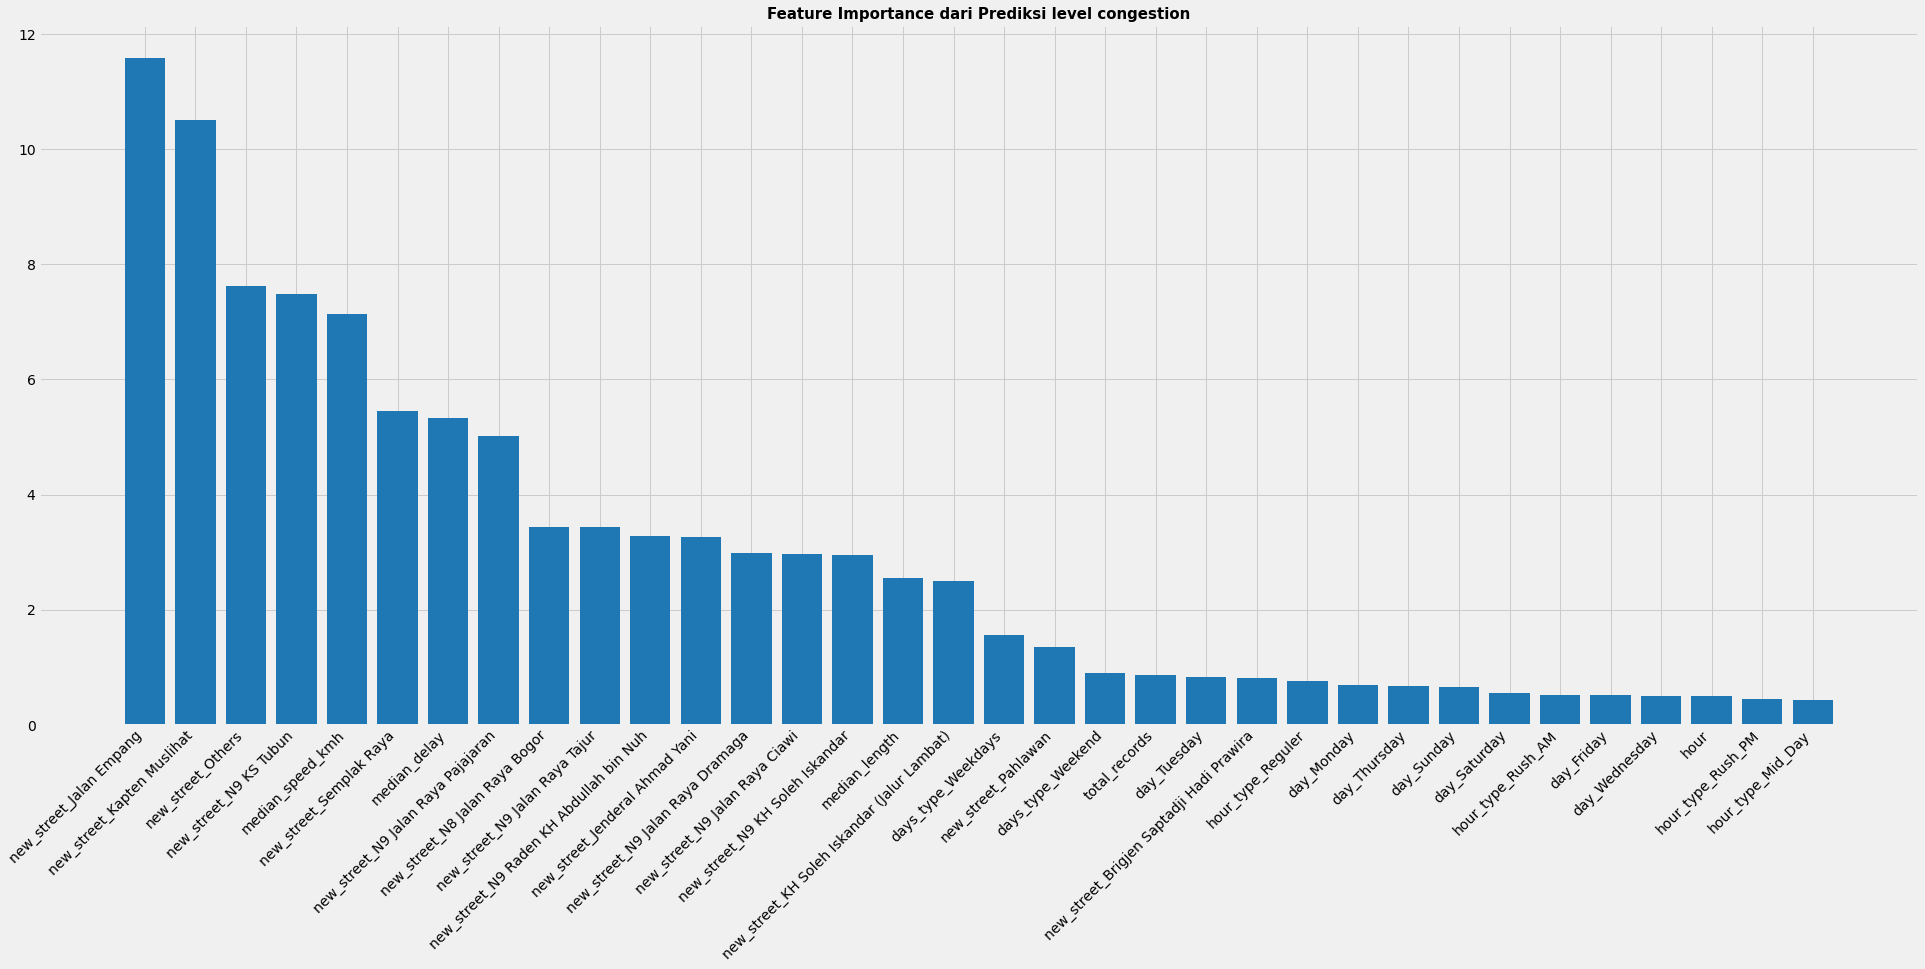

In [64]:
fig, ax = plt.subplots(figsize=(30,12))
ax.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45, ha='right')
ax.set_title('Feature Importance dari Prediksi level congestion', fontsize=15, fontweight='bold')
plt.show